## Notebook for pareto optimization using reduction function (n-> 1)

ToDo:
_build pipeline for testing algorithms!! as in pipeline notion_

CAUTION: minimum in one component is not nn a pareto point...!

In [1]:
import numpy as np
import random
from tqdm import tqdm
from pymoo.factory import get_problem
from pymoo.visualization.scatter import Scatter
from scipy.optimize import minimize
from pymoo.factory import get_performance_indicator

In [2]:
n_var = 10

In [3]:
problem = get_problem("dtlz2", n_var=n_var, n_obj=2)

# The pareto front of a scaled zdt1 problem
pf = problem.pareto_front()

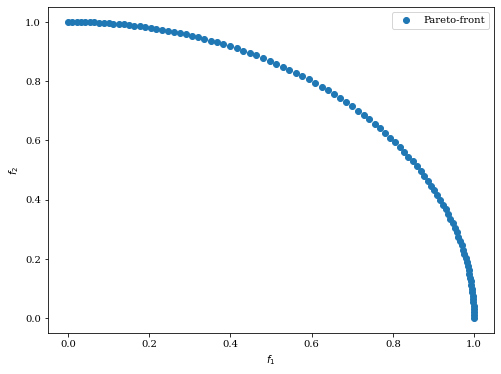

In [4]:
# plot the result
Scatter(legend=True).add(pf, label="Pareto-front").show()

In [5]:
def f(x):
    evaluations.append(x)
    return problem.evaluate(x)

In [6]:
def g(x,theta,potence):
    return np.sum((x*theta)**potence)

In [7]:
x0 = list([0 for i in range(n_var-1)])
x0.append(0)

In [8]:
#x0 = list([0.4+1/(i+1) for i in range(n_var)])

---

In [9]:
evaluations = []
eval_reducer = []
eval_n = 0
potence = 2
theta = np.array([1, 1])
bnds = tuple([(0, 1) for _ in range(n_var)])

In [10]:
res = minimize(lambda x: g(f(x),theta,potence),
               x0,
               method='SLSQP',
               bounds=bnds,
               options={
                   'disp': True,
                   'maxiter': 10
               })
eval_n += res.nfev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0
            Iterations: 2
            Function evaluations: 23
            Gradient evaluations: 2


In [11]:
number_starting_points = 3
starting_points = [np.array([random.random() for _ in range(n_var)]) for _ in range(number_starting_points)]

starting_points = [np.array([1 if i==j else 0 for i in range(n_var)]) for j in range(n_var)]


In [12]:
# both entries greater than zero -> no local minimum
for starting_point in starting_points:
    res = minimize(lambda x: g(f(x),theta,potence),
               starting_point,
               method='SLSQP',
               bounds=bnds,
               options={
                   'disp': True,
                   'maxiter': 5
               })
    eval_n += res.nfev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0
            Iterations: 2
            Function evaluations: 23
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0
            Iterations: 2
            Function evaluations: 23
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0
            Iterations: 2
            Function evaluations: 23
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0
            Iterations: 2
            Function evaluations: 23
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0
            Iterations: 2
            Function evaluations: 23
            Gradient evaluations: 2
Optimization terminated successfull

In [13]:
points = np.array([list(problem.evaluate(x).flatten()) for x in evaluations])

In [14]:
points

array([[3.25000000e+00, 0.00000000e+00],
       [3.25000000e+00, 7.60717401e-08],
       [3.24999999e+00, 0.00000000e+00],
       [3.24999999e+00, 0.00000000e+00],
       [3.24999999e+00, 0.00000000e+00],
       [3.24999999e+00, 0.00000000e+00],
       [3.24999999e+00, 0.00000000e+00],
       [3.24999999e+00, 0.00000000e+00],
       [3.24999999e+00, 0.00000000e+00],
       [3.24999999e+00, 0.00000000e+00],
       [3.24999999e+00, 0.00000000e+00],
       [3.25000000e+00, 1.06474679e-13],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 2.34067056e-08],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 1.63807199e-14],
       [1.00000000e+00, 1.63807199e-14],
       [1.99005105e-16, 3.25000000e+00],
       [7.607174

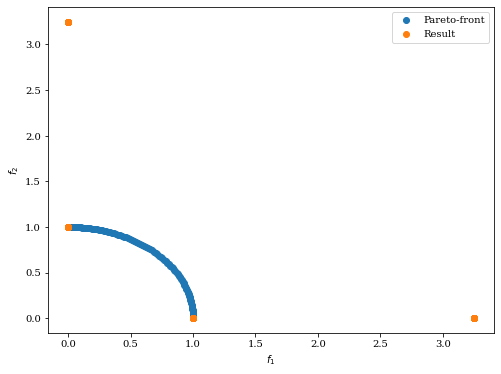

In [15]:
# The result found by an algorithm

# plot the result
Scatter(legend=True).add(pf, label="Pareto-front").add(points,
                                                       label="Result").show()



In [16]:
# calculate hypervolume
hv = get_performance_indicator("hv", ref_point=np.array([1.5, 1.5]))
print('Dimension')
print("max hv", hv.do(pf))
print("hv", hv.do(points))
print("relative hv", hv.do(points)/hv.do(pf))
print('Number of evaluations :', eval_n)


Dimension
max hv 0.6501303514688243
hv 0.43999999999999706
relative hv 0.6767873534990566
Number of evaluations : 253


In [17]:
g(pf[30],theta,potence)

1.0

In [18]:
min([g(point,theta,potence) for point in points])

1.0